# Workshop: Assumptions, Diagnostics and Transformations


## Diagnostic Plots
Generally speaking, the standard plots created by `R` when calling `plot(mod)` are all that you need to assess a linear model. In the accompanying lesson, we saw the standard 4 plots created with this method. However, there are some additional plots that can be useful to see various assumptions or data features more clearly. Here, we will have a brief rundown of some of the more useful.

### Correlation Plots
Although previously we indicated that assessing correlation between predictors is best served by the VIF, it can be useful at times to investigate correlation as part of the initial descriptive exploration of the data, prior to fitting any model. For that purpose, a correlation plot can be useful. In the example below, we use the `corrplot` package to visualise the entire `mtcars` dataset.

corrplot 0.95 loaded



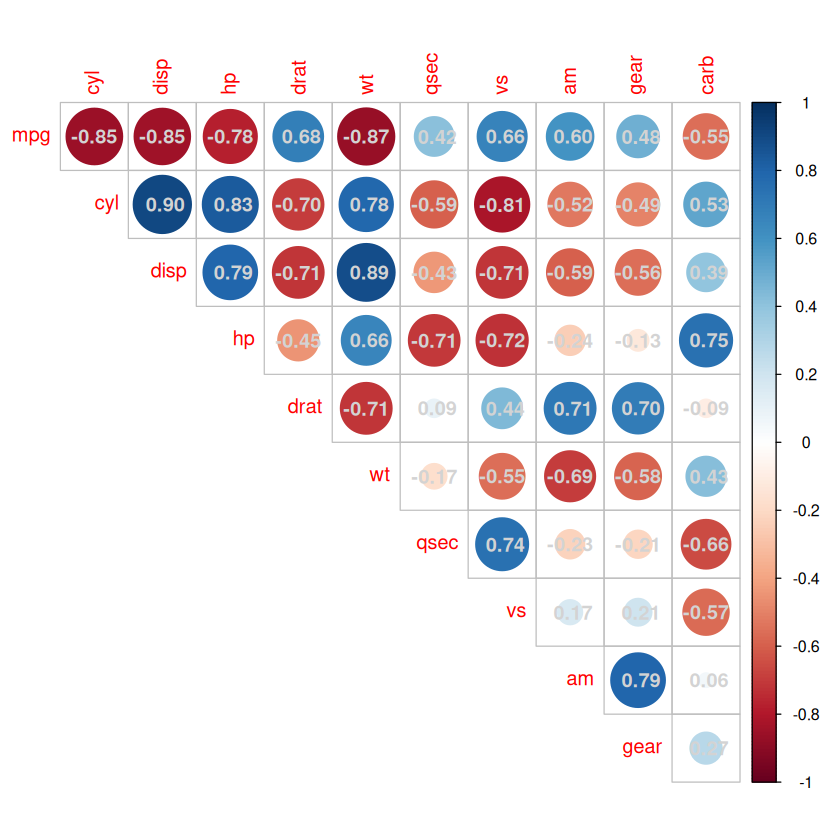

In [1]:
library('corrplot')
data(mtcars)
corrplot(cor(mtcars), 
        type='upper',            # just upper-diagonal
        addCoef.col='lightgrey', # add coeficient labels
        diag=FALSE)              # hide diagonal

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Have a look at all the options available by typing <code>?corrplot</code> and skimming through the documentation. Have a go at changing some of these.
</div>

Using the options specified in the original code above, there are several useful visual indicators here to alert us to problems. Firstly, the size of the circle is indicative of the magnitude of the correlation, so bigger circles are more of a warning than smaller circles. The *transparency* of the circles is also indicative of the magnitude, so this is a useful visual way of drawing our attention to larger correlations. Finally, the colour of the circles is indicative of the *direction* of the correlation, so that red shows *negative* and blue shows *positive*. 

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> At the stage of trying to think about which <i>predictor variables</i> would be of most interest (when <code>mpg</code> is the outcome), which row/column should we be focussing on? Once we have some predictor variables, which rows/columns should we look at to decide whether multicollinearity might be a problem?
</div>

We can also see these relationships in terms of the actual data using a *pairs plot* 

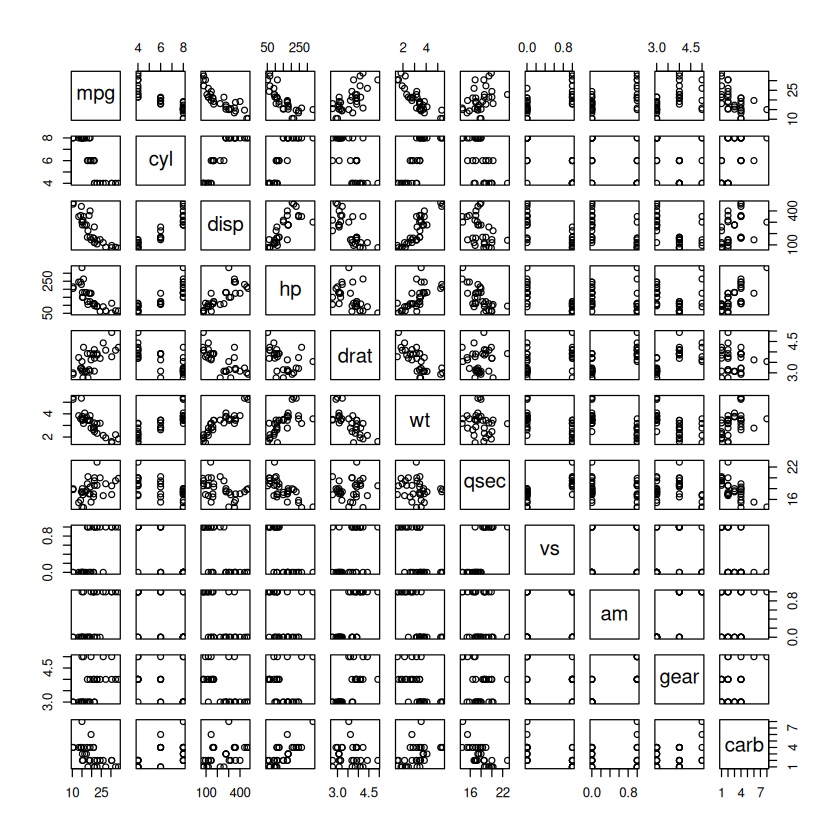

In [2]:
pairs(mtcars)

On its own, this will plot *everything* in the data frame, which can be difficult to see. We can be more specific by providing a formula, just like `lm()`

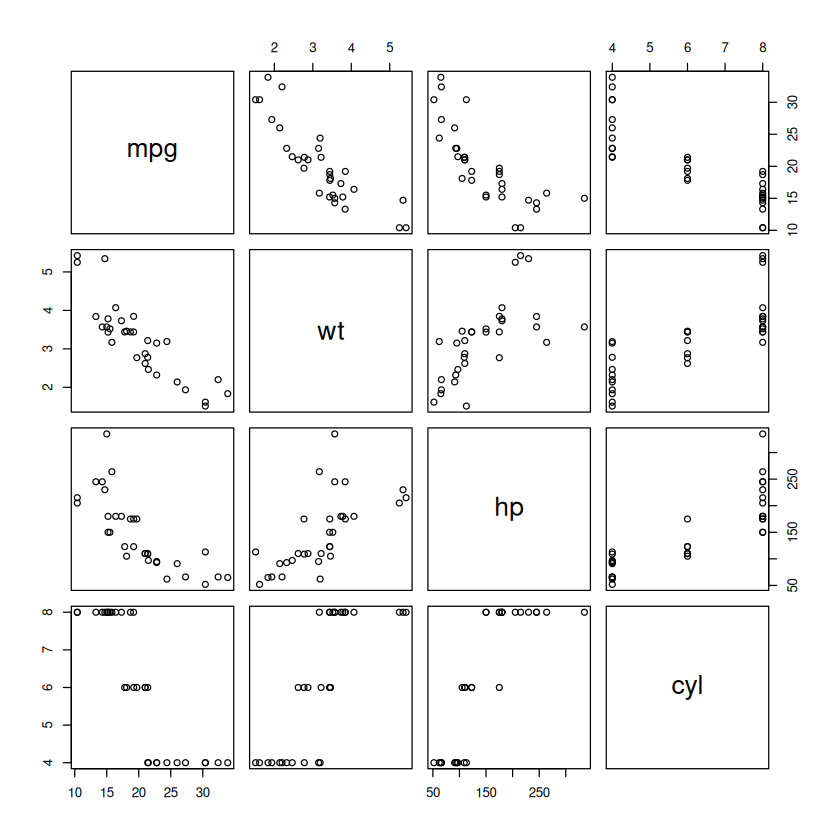

In [3]:
pairs(mpg ~ wt + hp + cyl, data=mtcars)

So now we can eye ball the relationships between the outcome and predictors, as well as the relationships *between* the predictors. Remember, these are not corrected for each other and so may not represent the result we would get from a multiple regression. This is more akin to multiple *simple* regression models.

### VIF Barplot
As part of the accompanying lesson, we discussed the VIF and how to produce VIF values. However, it can be useful to visualise these as a bar chart with standard cut-offs of 5 and 10. In the example below, we include the same `wt.copy` variable as used in the lesson to simulate multicollinearity.

Loading required package: carData



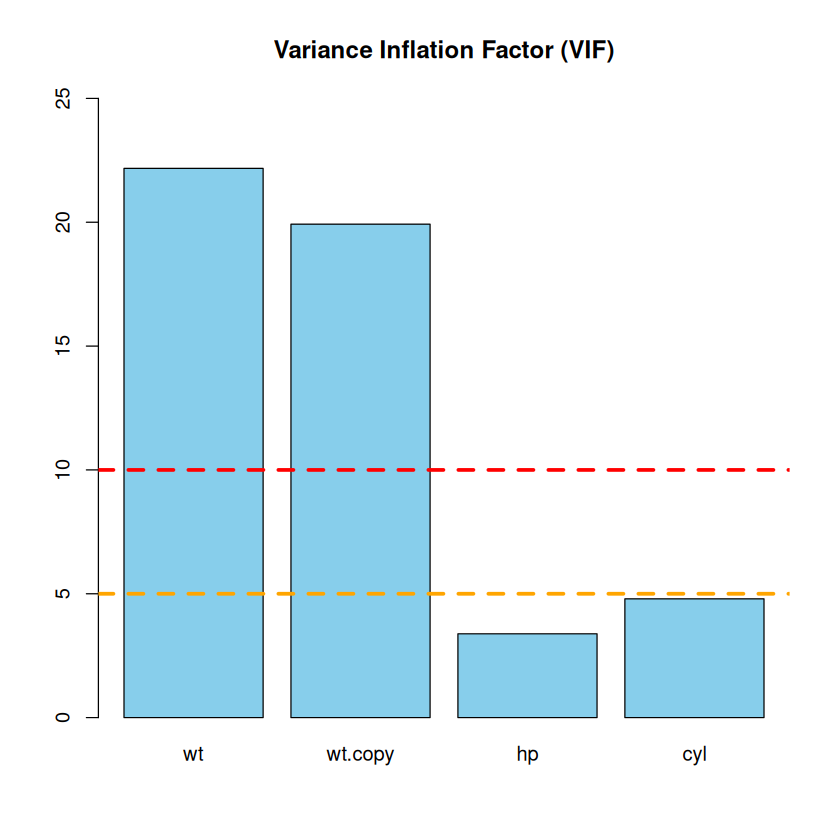

In [4]:
library(car)
set.seed(666)
wt           <- mtcars$wt
wt.copy      <- wt + rnorm(n=length(wt), mean=0, sd=0.2)        # wt + random noise
mod.multicol <- lm(mpg ~ wt + wt.copy + hp + cyl, data=mtcars)
vif.values   <- vif(mod.multicol)

barplot(vif.values, main="Variance Inflation Factor (VIF)", col="skyblue", ylim=c(0,25))
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Use the code above to draw this chart again after removing <code>wt</code> from the model and then do this again after using <code>wt.copy</code> from the model. Keep the <code>ylim=c(0,25)</code> argument the same so you can directly compare the plots. Can we use VIF to tell us <i>which</i> predictor to remove from the model? What does this imply about the role of the analyst in the process of model building?
</div>

### Influence Plot
Another useful plot included as part of the `car` package is the *influence* plot, where studentised residuals, leverage, Cook's distance and standard thresholds for extreme points are all combined into the same plot. As an example:

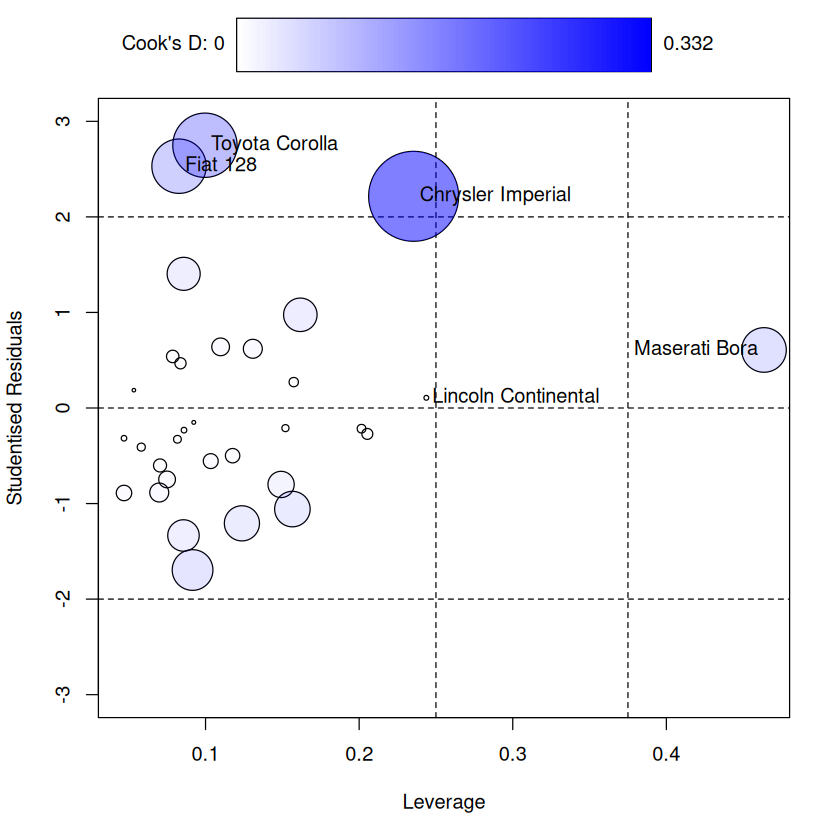

In [5]:
mod     <- lm(mpg ~ wt + hp + cyl, data=mtcars)
notable <- influencePlot(mod, xlab="Leverage", ylab="Studentised Residuals", ylim=c(-3,3))

Here we can see leverage plotted against the *studentised* residuals, with the magnitude of Cook's Distance displayed as bubbles of different sizes around each point. The mapping between these bubbles and Cook's Distance is shown by the colour bar at the top. Looking at the top value of the colour map, we can see it is below our lower heuristic of $D > 0.5$, meaning we have little concern here in terms of Cook's distance. In addition, heuristics of 2 and -2 are shown vertically for outliers, with heuristics of $2\frac{p}{n}$ and $3\frac{p}{n}$ shown horizontally for leverage. Notable points have also been labelled and are returned as a data frame

In [6]:
print(notable)

                      StudRes        Hat        CookD
Lincoln Continental 0.1065775 0.24373270 0.0009486833
Chrysler Imperial   2.2153833 0.23547715 0.3316313326
Fiat 128            2.5303244 0.08274176 0.1210330843
Toyota Corolla      2.7498370 0.09961207 0.1694339333
Maserati Bora       0.6073374 0.46356582 0.0815260489


How these points are chosen requires a little explanation. The labels are based on the top two points for each of the influence measures. For the studentised residuals, the two largest points are `Toyota Corolla` and `Fiat 128`. For the leverage values, the two largest points are `Maserati Bora` and `Lincoln Continental`. For Cook's Distance, the two largest points are `Chrysler Imperial` and `Toyota Corolla`. So this gives five unique data points (because `Toyota Corolla` appears *twice*). The labelling in the plot can then be thought of as the two largest values horizontally, the two largest vertically, and the two largest in terms of their bubble size. Of note is that this will happen irrespective of whether any of the data points are above any threshold of concern on any measure. For instance, none of these data have $D_{i} > 0.5$, despite the function still labelling the top two values.

### Effects Plots
In the accompanying lesson, we discussed the use of effects plots as a useful alternative to added variable plots. Although the mechanics of effects was plots explained, it can be helpful to see how we could calculate these manually. Remember, rather than *removing* the influence of other variables, effects plots work by *fixing* the other variables to a constant value so that only the variable of interest changes. We can illustrate this using the `predict()` function in `R`. To begin with, we create a new dataset containing our predictors of interest. Here our focus is on the `wt` variable, so we keep this variable the raw as the raw data and fix `hp` and `cyl` to their *mean* value.

In [ ]:
n       <- length(mtcars$mpg)
wt.data <- data.frame("wt" = mtcars$wt,             # raw wt
                      "hp" =rep(mean(mtcars$hp),n), # mean of hp
                      "cyl"=rep(mean(mtcars$cyl),n) # mean of cyl
                      )

print(head(wt.data)) # print the first 6 observations

     wt       hp    cyl
1 2.620 146.6875 6.1875
2 2.875 146.6875 6.1875
3 2.320 146.6875 6.1875
4 3.215 146.6875 6.1875
5 3.440 146.6875 6.1875
6 3.460 146.6875 6.1875


We can now pass this new data frame to the `predict()` function, which will use the parameter estimates from the model and apply the regression equation to each row of values in the new data set. This will create a set of *predictions* from the model. Because the only element that varies is `wt`, these predictions will correspond to the regression slope for `wt`, holding everything else constant. We can see that when we plot the values returned by `predict()`.

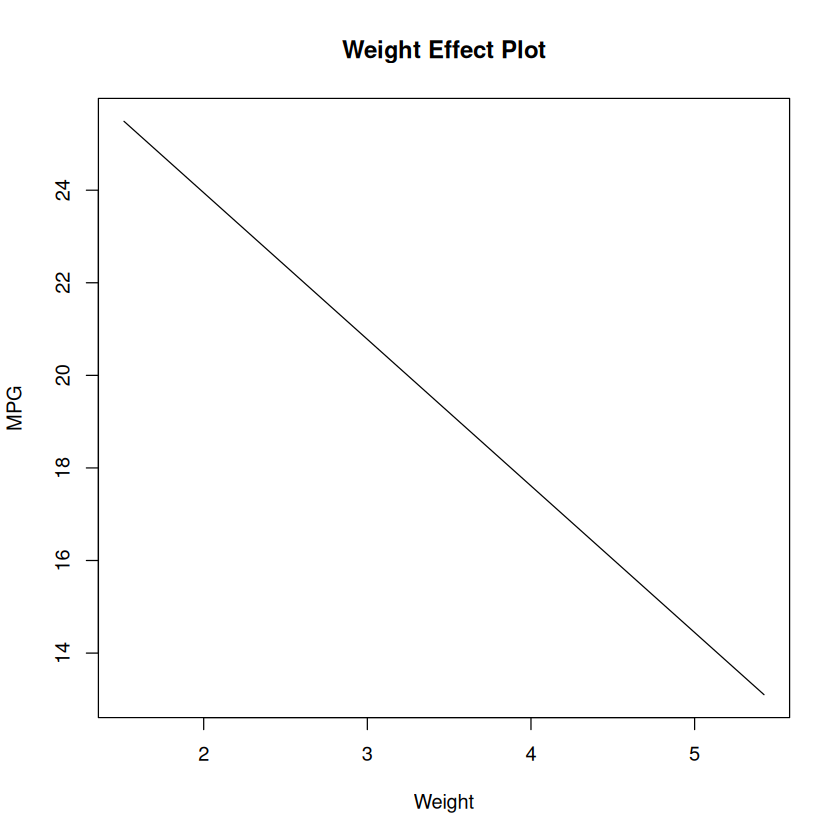

In [8]:
wt.effect <- predict(object=mod, newdata=wt.data) # b0 + b1*wt + b2*hp + b3*cyl
plot(mtcars$wt, wt.effect, type="l", xlab="Weight", ylab="MPG", main="Weight Effect Plot")

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Can you get the same values for <code>wt.effect</code> without using <code>predict</code>? <b>HINT</b> If you first extract the estimated regression parameters to a variable called <code>beta</code>, you can do this in a single line of code.
</div>

As we can see, this is the same as the effect plot for `wt`. Here we switch the confidence bands off to make the comparison clearer.

lattice theme set by effectsTheme()
See ?effectsTheme for details.



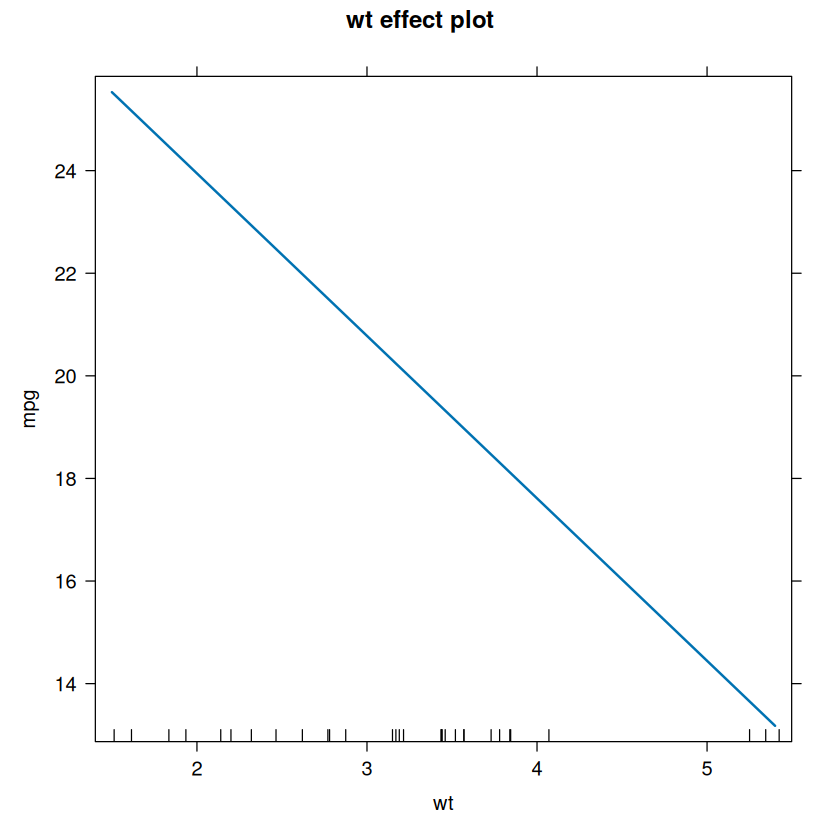

In [9]:
library(effects)
plot(effect('wt', mod, confidence.level=0))

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> What happens if you use a constant value other than the mean? How does the plot change for a fixed value of 0 or some other value of <code>hp</code> or <code>cyl</code>? How does this change the interpretation?
</div>

We can also manually create the plot that includes the residuals by using the following

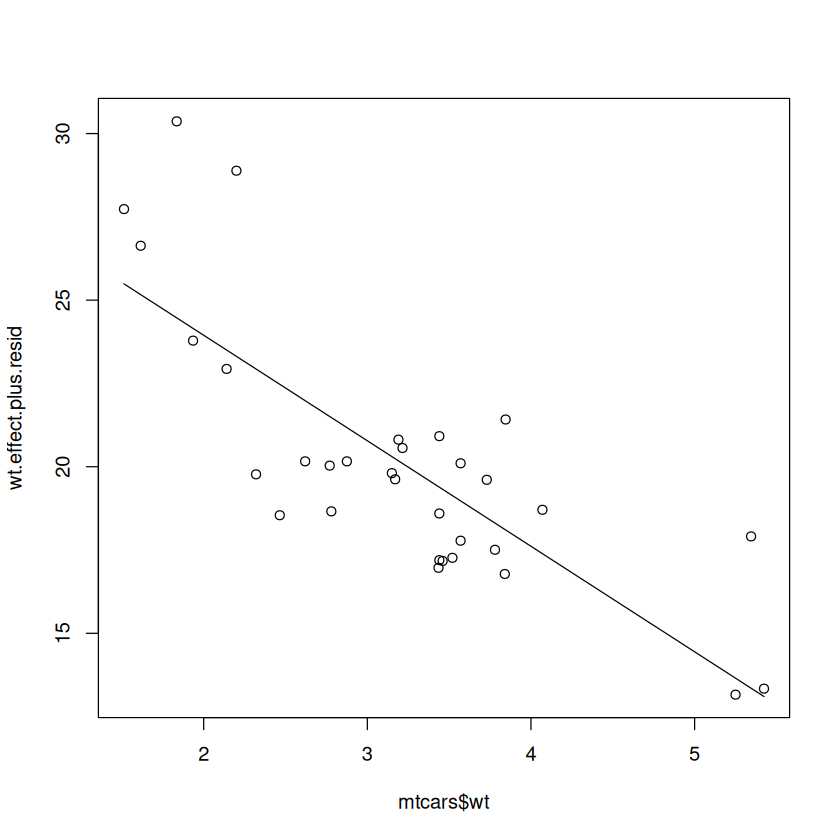

In [10]:
wt.effect.plus.resid <- wt.effect + resid(mod)
plot(mtcars$wt,  wt.effect.plus.resid)
lines(mtcars$wt, wt.effect)

which also agrees with what we get from the `effects` package, which we can see below. Again, we remove the confidence bands and the smoothed line through the points to make the comparison clearer.

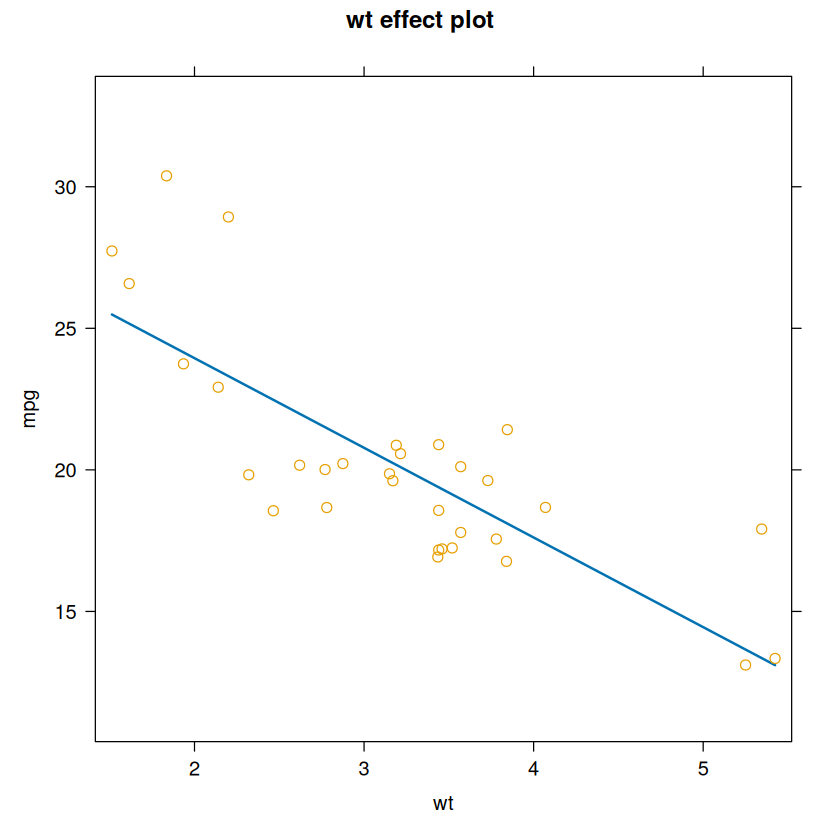

In [11]:
plot(effect('wt', mod, confidence.level=0, residuals=TRUE), partial.residuals=list(smooth=FALSE))

## Polynomial Regression
In the accompanying lesson, we introduced polynomial regression as a solution when a straight-line did not appear to fit the data well. This is one of the most powerful options available to you to allow much more complex relationships between variables to be captured within a regression framework. In the lesson, we made use of the `poly()` function, but it is worth spending a little more time understanding *why* this was used. 

### Including Different Powers Directly
To illustrate why we use the `poly()` function, we will first start with a basic polynomial model of `wt`. For the sake of argument, we will say that through our diagnostic investigations we have decided that a polynomial of degree 2 would be a good idea (also known as a *quadratic* polynomial). The theoretical model for this would be

$$
y_{i} = \beta_{0} + \beta_{1}x_{i} + \beta_{2}x^{2}_{i} + \epsilon_{i}.
$$

So, it looks like we can just enter `wt` and `wt^2` into the model formula and be done. However, there are two issues with this. The first is a purely implementation `R`-specific issue, and the second is much more general.

In terms of the first issue, to include transformations directly in an `R` formula, we need to use the `I()` function, which tells `R` to treat whatever is inside the brackets literally. This is needed because many common symbols have special meanings inside an `R` formula. So this function can be taken to mean *Inhibit* the formula interpretation. For example, `*` usually means *multiply*, but inside an `R` formula it means something else (as we will see later in the ANOVA lesson). If we want `*` to still mean *multiply* within a formula, we have to use `I()`. This can be thought of as *inhibit interpreting this bit as a formula*. Similarly, if we want to raise a variable to a certain power, we would normally use

In [12]:
print(mtcars$wt^2)

 [1]  6.864400  8.265625  5.382400 10.336225 11.833600 11.971600 12.744900
 [8] 10.176100  9.922500 11.833600 11.833600 16.564900 13.912900 14.288400
[15] 27.562500 29.419776 28.569025  4.840000  2.608225  3.367225  6.076225
[22] 12.390400 11.799225 14.745600 14.784025  3.744225  4.579600  2.289169
[29] 10.048900  7.672900 12.744900  7.728400


However, the `^` symbol means something else inside an `R` formula. If we try it, notice it does not do what we expect

In [13]:
poly.mod <- lm(mpg ~ wt + wt^2, data=mtcars)
print(poly.mod)


Call:
lm(formula = mpg ~ wt + wt^2, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  



Instead, we need to wrap this inside `I()` to tell `R` that we mean *treat this symbol as its usual meaning, not the special formula meaning*. For example

In [14]:
poly.mod <- lm(mpg ~ wt + I(wt^2), data=mtcars)
print(poly.mod)


Call:
lm(formula = mpg ~ wt + I(wt^2), data = mtcars)

Coefficients:
(Intercept)           wt      I(wt^2)  
     49.931      -13.380        1.171  



This solves our first problem. In terms of the second problem, let us have a look at the VIF values

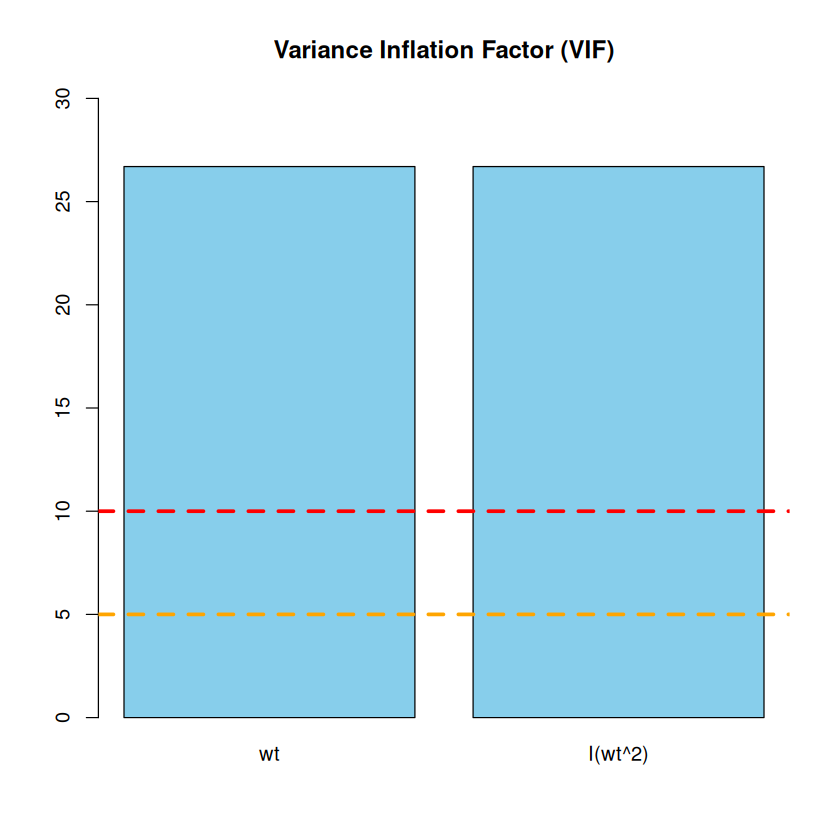

In [15]:
vif.values <- vif(poly.mod)
barplot(vif.values, main="Variance Inflation Factor (VIF)", col="skyblue", ylim=c(0,30))
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

So now we can see the other issue more clearly. Including both `wt` and `wt^2` causes a massive multicollinearity problem.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Before reading on, can you think what might be causing this result? Could you use some of the plots from earlier to investigate this further?
</div>

### Orthogonal Polynomials
Hopefully from the above it is clear that the problem is that when you raise a variable to any power it will remain *strongly correlated* with the original variable. This will then causes multicollinearity issues. The solution is that we need to use *orthogonal polynomials*, which is what the `poly()` function creates for us. In this context, *orthogonal* is taken to mean *uncorrelated*. As an example, we can rerun the model above using `poly()` and then check the VIF.

In [16]:
poly.mod <- lm(mpg ~ poly(wt,degree=2), data=mtcars)
print(poly.mod)


Call:
lm(formula = mpg ~ poly(wt, degree = 2), data = mtcars)

Coefficients:
          (Intercept)  poly(wt, degree = 2)1  poly(wt, degree = 2)2  
               20.091                -29.116                  8.636  



Unfortunately, the `vif()` function from `car` gets a bit confused when we have `poly()` in the model formula, so we extract the predictors and add them manually to get the VIF values. This is usually unnecessary, so it should only be needed for this demonstration

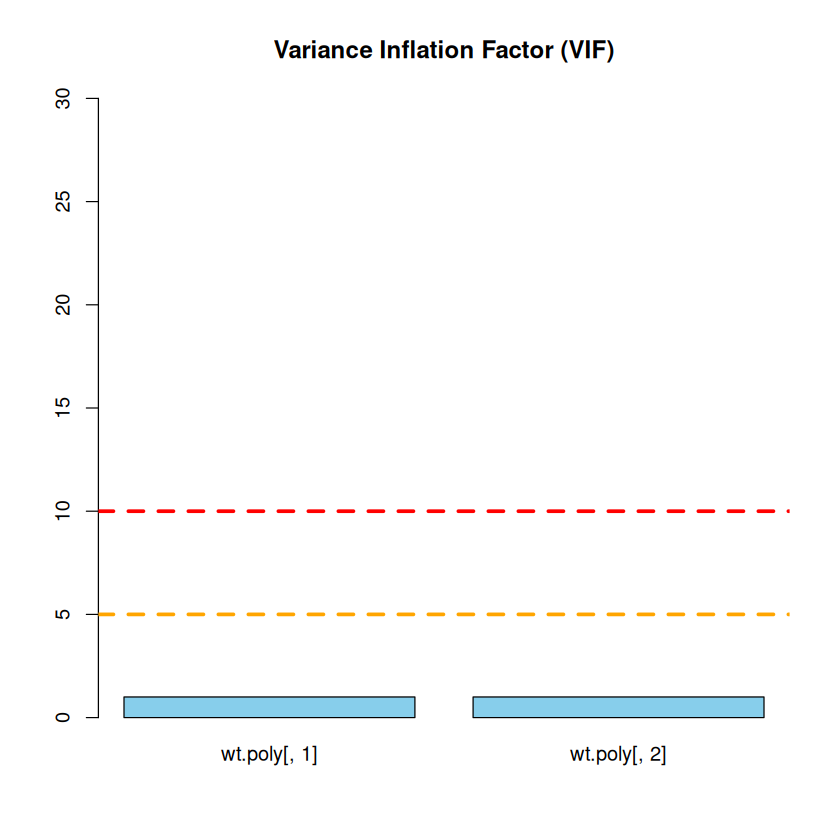

In [17]:
wt.poly      <- poly(mtcars$wt, degree=2)
poly.mod.alt <- lm(mpg ~ wt.poly[,1] + wt.poly[,2], data=mtcars)
vif.values   <- vif(poly.mod.alt)

barplot(vif.values, main="Variance Inflation Factor (VIF)", col="skyblue", ylim=c(0,30))
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

As we can see, these predictors are *perfectly uncorrelated*. The VIF is 1 for each, meaning the variance is *not inflated at all* with these two predictors in the model. This is the essence of two variable being *orthogonal*. We can also see this by calculating their correlation as well

In [18]:
cor(wt.poly[,1],wt.poly[,2])

[1] 5.514184e-19

which is basically *exactly 0*, as far as the computer is concerned.

How is this done? In a way, it does not really matter, but if you are curious then the method is very similar to what we do when we create *added variable plots*. In effect, we just need to *remove* the relationship between the variable by taking the residuals of several regression models. An example is given below. For each term, we basically remove the effect of all *lower degree terms*. So the linear term has the constant effect removed, and the quadratic term has the constant and linear effects removed. The output from `lm()` is the identical in terms of fit, $t$-statistics and $p$-values when compared to the model using `poly()`.

In [19]:
wt.1 <- resid(lm(wt   ~ 1,    data=mtcars)) # wt   with constant effect removed
wt.2 <- resid(lm(wt^2 ~ wt.1, data=mtcars)) # wt^2 with constant + linear effect removed

summary(lm(mpg ~ wt.1 + wt.2, data=mtcars))


Call:
lm(formula = mpg ~ wt.1 + wt.2, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.483 -1.998 -0.773  1.462  6.238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0906     0.4686  42.877  < 2e-16 ***
wt.1         -5.3445     0.4865 -10.985 7.52e-12 ***
wt.2          1.1711     0.3594   3.258  0.00286 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.651 on 29 degrees of freedom
Multiple R-squared:  0.8191,	Adjusted R-squared:  0.8066 
F-statistic: 65.64 on 2 and 29 DF,  p-value: 1.715e-11


This process is known as *orthogonalisation*. By removing the effects of one variable from another, we are manually assigning which of the variables gets to own the overlap in explanatory variance. For instance, by removing the effect of `wt` from `wt^2`, we are taking the overlap between these terms and giving it to `wt`. If you think of a Venn diagrams between these variables, it is like giving `wt` both its unique part of the circle *and* the overlap with `wt^2`. So `wt` now explains the whole circle and `wt^2` represents the remaining crescent moon of unique variance. 

<div class="alert alert-block alert-warning"> 
<b>IMPORTANT</b> Orthogonalisation can be performed on any variables to remove correlation between them. This is justifiable for something like polynomials, because the terms are taken as a <i>whole</i> to compute a single wiggly line. As such, the total amount of variance explained by all the polynomial terms does not change, just how it is assigned. Doing this with other variables that are to be taken separately is almost always <i>unjustifiable</i> as it will directly affect their interpretation. It is a very strong transformation to simply give overlapping variance from one variable to another. Furthermore, we no longer have any easy way of interpreting what the regression results mean. No one measures an orthogonalised variable in reality, so its meaning is essentially nothing. This is especially true because different methods of orthogonalisation will produce different uncorrelated variables with different coefficients. The orthogonalisation approach is therefore arbitrary. Though the total variance explained by the model remains the same, the individual variables become meaningless. So, even though this has solved the numeric problem of multicollinearity, in doing so orthogonalisation destroys the whole point of the regression model.
</div>

There are a few more points to be aware of here. `poly()` uses a different scaling to the result you get from manually orthogonalising the polynomial terms, so the parameter estimates and standard errors will be different. Because of this, it is difficult to interpret these effects in any precise numeric fashion. However, the way to think of them is as the *unique linear effect* and the *unique quadratic effect*. The tests of these effects can be taken as indications of whether the *quadratic component* is needed and whether the *linear component* is needed to provide a good model fit. In addition, we tend to think of the polynomial terms as a *whole*, because they produce a *single* curved line. So it is really the total explanatory power of all the polynomial terms together that matters, not what the individual terms mean.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Can you follow the pattern above to create manual orthogonal polynomials for a <i>cubic</i> model of <code>wt</code> (i.e. a degree of 3)? Compare these to the results of using <code>poly(wt,degree=3)</code>. What does the test on the cubic component imply?
</div>

A final detail to recognise is that using orthogonal or raw polynomials will not affect the model fit. Remember, multicollinearity is an issue for the *standard errors* and thus only matters in terms of *inference*. The model fit is the same irrespective of which approach we use. The total amount of explanatory variance remains the same in both cases. The difference is that raw polynomials cause the regression model to try to "automatically" partition the variance, whereas orthogonal polynomials have had the variance manually partitioned. When correlation is high, there are many options for partitioning the variance, which makes the uncertainty around the estimates very high. This makes the model very unstable. In the case of polynomials, we have manually intervened and told the model how to resolve this problem by pre-partitioning the overlapping variance. We can see this equivalence of model fit illustrated below

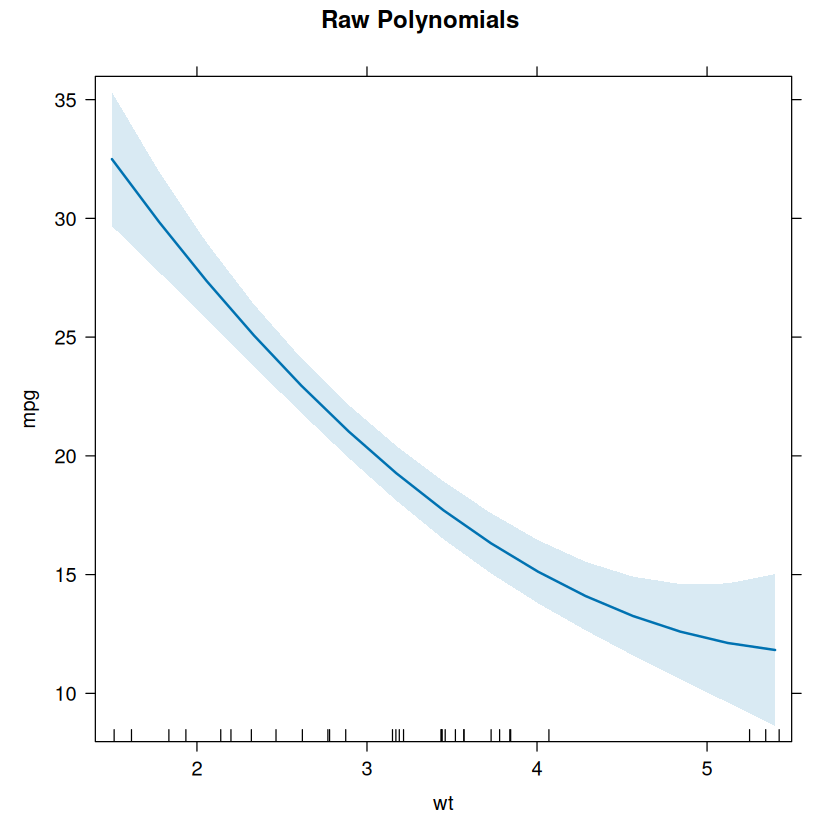

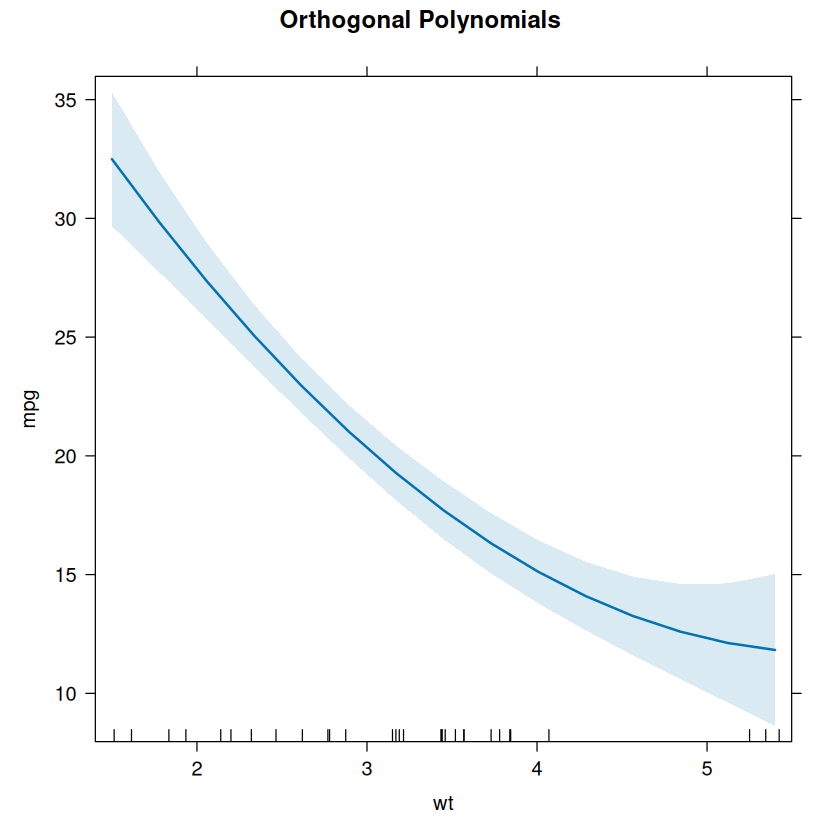

In [20]:
poly.mod.raw <- lm(mpg ~ wt + I(wt^2), data=mtcars)
poly.mod.ort <- lm(mpg ~ poly(wt,2),   data=mtcars)

plot(effect('wt', poly.mod.raw), main='Raw Polynomials')
plot(allEffects(poly.mod.ort),   main='Orthogonal Polynomials')

## Alternative Models When Assumptions are Violated
As a final part in this workshop, we will consider a different solution to assumption violations. Rather than trying to transform our way out of a hole, we instead consider a different *model* that is able to more flexibly accommodate a particular assumption violation. Note that we are only giving an idea of each method below. Each one could encompass its own lesson and so there is much more to learn about each. The aim here is just to make you *aware* that these method exist. It is then up to you if you want to dig into them to understand the methods further.

### Robust Regression for Outliers
Our first option is for dealing with *outliers*. Although we have several methods for detecting outliers, our approaches for dealing with them are quite limited. In general, we can either remove them or leave them in place. Removing them is an extreme measure that is only really justifiable when the data is unambiguously *wrong*. In place cases, we cannot make sure a strong claim. However, we know that leaving them in place can bias the regression model. So what can we do?

In cases where we are particularly worried about this, we can use a method known as *robust regression*. This is something of a catch-all term for a variety of different approach, each with the aim of reducing the influence of outliers on the regression results. However, each method tends to be similar in that the problem is tackled by defining a set of *weights* that work to reduce the influence of individual data points. A weight is defined for each data point where a weight of 1 will simply include the original data point and a weight < 1 will reduce the magnitude of the data point. These weights are assigned using rules about the magnitudes of the residuals from the model fit, so there is an iterative approach here where the model is fit, weights are computed, the model is refit with the weights, the weights are then recomputed using the next set of residuals and so on. This will be continued until some stopping criteria is reached (usually related to the weights not changing meaningfully after each new iteration). The idea is imply to *down-weight* the influence of outliers on the model fit.

As an example, we will use the `lmrob()` function from the `robustbase` package. Much more can be learned about this method through its documentation, but we just illustrate the basic method here. We will illustrate the difference from the standard `lm()` results below

In [21]:
library(robustbase)

robust.mod   <- lmrob(mpg ~ wt + hp + cyl, data=mtcars) # robust regression
unrobust.mod <- lm(mpg ~ wt + hp + cyl, data=mtcars)    # OLS regression

summary(robust.mod)
summary(unrobust.mod) 


Call:
lmrob(formula = mpg ~ wt + hp + cyl, data = mtcars)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-3.4606 -1.3597 -0.2818  1.2963  6.4483 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.846504   2.330256  16.241  8.8e-16 ***
wt          -3.114388   0.709847  -4.387 0.000148 ***
hp          -0.016532   0.008431  -1.961 0.059913 .  
cyl         -0.901334   0.473229  -1.905 0.067146 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Robust residual standard error: 2.211 
Multiple R-squared:  0.8425,	Adjusted R-squared:  0.8257 
Convergence in 12 IRWLS iterations

Robustness weights: 
 4 weights are ~= 1. The remaining 28 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3751  0.8905  0.9546  0.8927  0.9778  0.9955 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.


Call:
lm(formula = mpg ~ wt + hp + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
wt          -3.16697    0.74058  -4.276 0.000199 ***
hp          -0.01804    0.01188  -1.519 0.140015    
cyl         -0.94162    0.55092  -1.709 0.098480 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


Here we can see that both `hp` and `cyl` have changed most dramatically. Focusing on `hp`, the standard error has reduced from `0.012` to `0.008` thanks to down-weighting outliers. We can see some information about the weights in the output from `lmrob()`, where only 4 of the original data points remain un-weighted and the *smallest* weight is given by `0.3751`, shrinking some data points by around 37% of their original value. These weights can be viewed using

In [22]:
print(robust.mod$rweights)

          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          0.9606454           0.9917463           0.8707532           0.9883181 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          0.9486403           0.9387561           0.9747702           0.9768062 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          0.9999322           0.9955010           0.9344154           0.9629984 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          0.9707809           0.9912045           0.9954155           0.9991701 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          0.6563780           0.4264125           0.9233249           0.3750911 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          0.7892214           0.9472616           0.9072091           0.9674825 
   Pontiac Firebird         

So we can see that most data points are close to their original value, but notably the value for `Toyota Corolla` shows it has been dramatically down-weighted. So too have `Fiat 128` and `Chrysler Imperial`.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Have a look back at some of the plots we made earlier. Does the selection of these points as targets for the most down-weighting track with what we already know? Can you order these weights from smallest to biggest so we can more easily identify which points have been shrunk the most?
</div>

Much like `lm()` we can create diagnostic plots for the robust regression, though these are different and are explained in more detail in the documentation (look up the method `plot.lmrob`). Because the `lmrob()` models exports the same standard methods as `lm()`, we can also create effects plots without any problems.

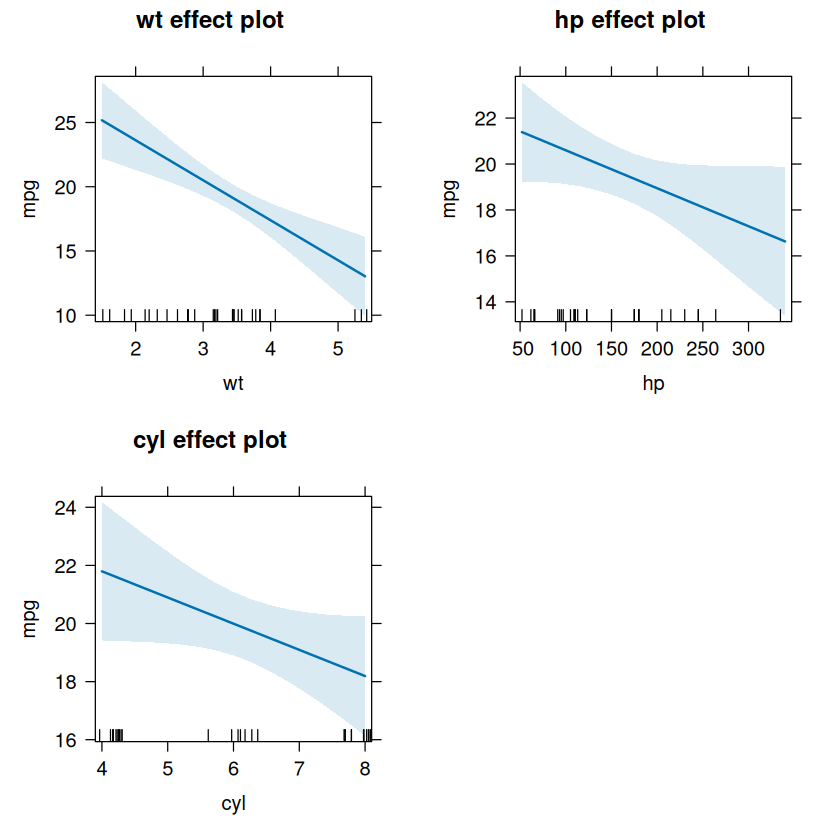

In [23]:
plot(allEffects(robust.mod))

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> The differences in slopes are very subtle in these plots, but have a look at the <i>confidence bands</i> around the slope for <code>hp</code> in the effects plots from the robust model compared to the original OLS model. What is the main difference you can see?
</div>

The only main element to be aware of is that the inferential tests on the model parameters are *approximations* within the context of a robust model. So we cannot treat them with quite the authority we do from `lm()`. Realistically, these should be considered *asymptotically correct*, meaning they will become more reliable the larger the sample size. Because of this, some implementations of robust regression will *refuse* to give you a $p$-value (e.g. `rlm()` from the `MASS` package). `lmrob()` does, but this is a bit controversial, so treat these with *extreme caution*.

### Generalised Least-squares for Heteroscedasticity
Our second option is for dealing with non-constant variance (heteroscedasticity). For some regression problems, we may find that the variance is actually some function of the predictors (perhaps *increasing* or *decreasing* with values of $x$). In other problems we will see later, the use of a *categorical* predictor variable can show problems of heteroscedasticity if the groups have unequal variances. In all these cases, there is little we can do with a traditional regression model unless we can find some variance-stabilising transformation that renders the data homoscedastic. Otherwise, we have to accept that there may be some element of bias in our estimation and inference.

For cases where this is especially problematic, we can turn to the method of *generalised least squares* (GLS). This approach is, as the name suggests, a generalisation of the OLS regression model, but one where we can specify a more complex variance function. Recall from multiple regression that the variance function is simple $\sigma^{2}_{i} = \sigma^{2}$. In other words, a *constant variance* for every observation. However, in cases of homoscedasticity, the variance changes depending upon the value of one or more of the predictor variables. In these situations, we can use GLS to estimate a model that takes this into account. In order to do this, and unlike the name implies, the method of Restricted Maximum Likelihood (REML) is used. Within `R`, we can use the `gls()` function from the `nlme` package to fit these types of models.

#### GLS for Simple Regression
For this first example, we will simulate some data as there are no major heteroscedasticity issues in our `mtcars` model. For simplicity, we will look at simple regression and then discuss multiple regression below. 

In terms of simulating heteroscedasticity, we will use a *power function* of the following form

$$
\sigma_{i} = \sigma|x|^{\delta}.
$$

In words, the standard deviation of each observation comes from some base value of variation ($\sigma$) multiplied by the absolute value of the predictor ($|x|$) raised to some power $\delta$. The reason this model is used is because it is the simplest mathematical way of specifying the idea that the *spread* expands with increasing or decreasing values of $x$. If we set $\delta = 0$, then this just becomes a constant variance term. If $\delta < 0$ then the spread of data *decreases* as $x$ increases, whereas if $\delta > 0$ then the spread of data *increases* as $x$ increases. The mechanism that controls *how* this spread changes given the units of $x$ is the magnitude of $\delta$. For any given problem, $\delta$ can be tuned so that the characteristic funnel shape in the spread of the data becomes whatever we want. The absolute value is simply here to make sure variance is always *positive* and no imaginary numbers are created (e.g. `(-7)^(-1.2)`). In the simulation below, we arbitrarily set $\delta = 0.8$, but it does not really matter what this means. The main point is that this creates a *funnel* shape in the diagnostic plots that typifies some sort of unmodelled structure in the variance function.

In [24]:
set.seed(666)

n      <- 200           # 200 simulated values
x      <- runif(n,1,10) # generate some random predictor values 
beta.0 <- 1             # population intercept
beta.1 <- 2             # population slope
sigma  <- 0.5           # population baseline variance
delta  <- 0.8           # population exponent

# simulate increasing variance with x
sd.x    <- sigma * abs(x)^delta 
y       <- beta.0 + beta.1*x + rnorm(n, mean=0, sd=sd.x)
sim.dat <- data.frame("x"=x, "y"=y)

We can see this if we fit an OLS model to the simulated data and create the diagnostic plots.

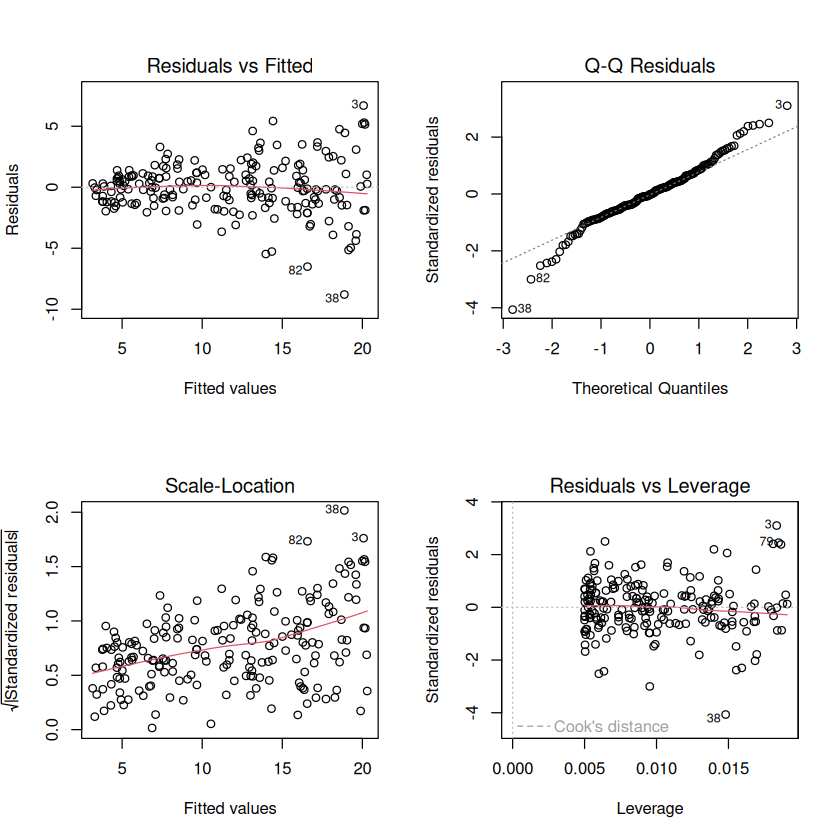

In [25]:
uneq.var.mod <- lm(y ~ x, data=sim.dat)
par(mfrow=c(2,2))
plot(uneq.var.mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Have a go at changing <code>delta</code> in the simulation code. Try values in the range -2 to +2. Can you get a sense of how flexible this simple framework is for understanding lots of situations where the magnitude of the variance relates to the value of the predictor?
</div>

In order to fit a model that captures this variance structure, we use the `gls()` function. This has a very similar form to `lm()`, as it takes a formula for the model and a `data` argument. The main difference comes in the specification of a *variance function*, using the `weights` argument. This takes one of several pre-structured variance functions that come with `nlme` to capture different kinds of heteroscedastic patterns in the data. You can read about all of these by typing `?varClasses` at the prompt. 

For this example, we will use the `varPower()` function, which implements a power function of the variance. To use this, we have to provide the `form` argument, which is simply a one-sided formula that specifies what variable (or variables) we want the variance function to use. This formula can get more complex and a lot more information about this sort of structure will appear when we cover *mixed-effects* models next semester. For now, we can just see the effect of including `varPower(form=~ x)` 

In [26]:
library(nlme)
gls.mod <- gls(y ~ x, data=sim.dat, weights=varPower(form=~ x))
summary(gls.mod)

Generalized least squares fit by REML
  Model: y ~ x 
  Data: sim.dat 
       AIC      BIC    logLik
  821.3133 834.4663 -406.6566

Variance function:
 Structure: Power of variance covariate
 Formula: ~x 
 Parameter estimates:
    power 
0.7452241 

Coefficients:
                Value  Std.Error  t-value p-value
(Intercept) 0.9564833 0.17784040  5.37832       0
x           1.9754567 0.04695575 42.07060       0

 Correlation: 
  (Intr)
x -0.816

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.9736550 -0.6664040 -0.0167884  0.7316562  2.4558752 

Residual standard error: 0.5804808 
Degrees of freedom: 200 total; 198 residual

Notice from the output that that $\hat{\delta} = 0.7452$, which is not far off the true value we used of $\delta = 0.8$. So we can see an output very similar to `lm()` here, with some additional information about the variance function. To see how effective this has been, we can plot the GLS model. This gives a plot of the fitted values against the *standardised residuals*. This is important, because the standardised residuals have had the estimated variance *removed* and thus show the effect of the variance function in a way that the raw residuals do not. We can compare this with the same type of plot from the original model to see how the funnel shape has been effectively removed.

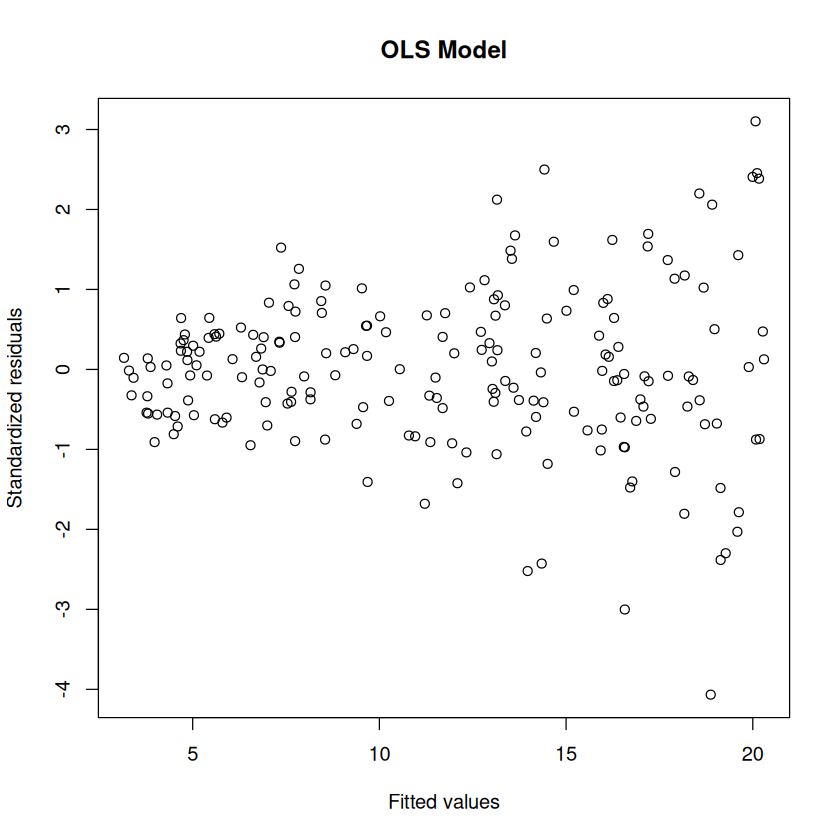

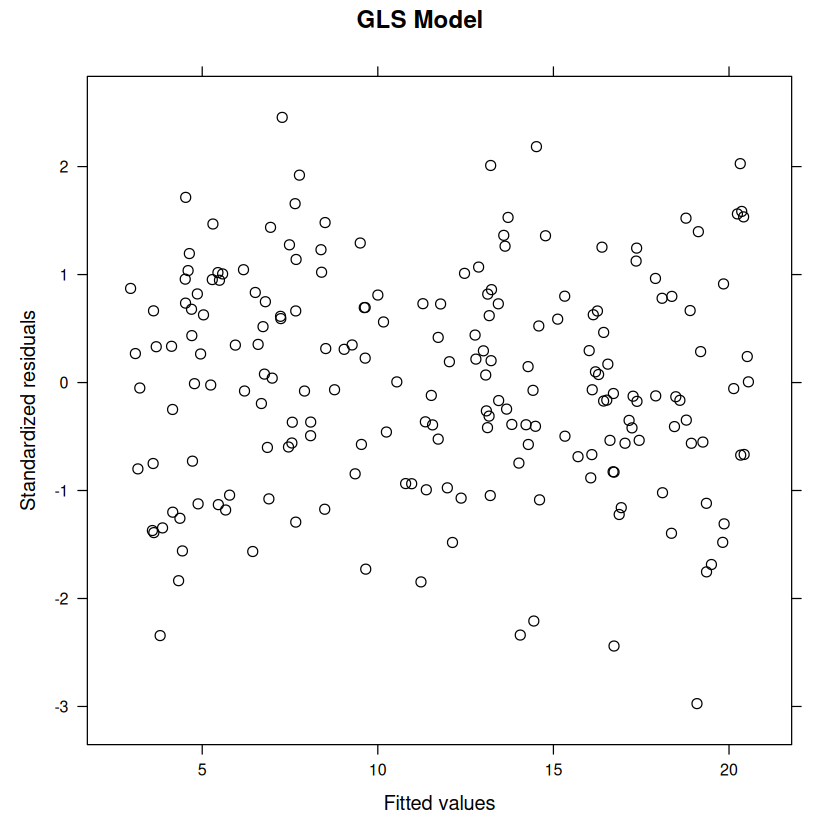

In [37]:
plot(fitted(uneq.var.mod), 
     rstandard(uneq.var.mod),
     xlab="Fitted values",
     ylab="Standardized residuals",
     main="OLS Model")

plot(gls.mod, col="black", grid=FALSE,
     main="GLS Model")

#### GLS for Multiple Regression
When we have *multiple* predictor variables, things get more tricky. Because the funnel shape in the diagnostic plots relates to the *fitted values*, this does not immediately indicate which of the predictors is contributing to the heteroscedasticity. When this is the case, we would ideally create some new scale-location plots with each predictor on the $x$-axis. As an example, let us look at `mtcars` again (though there is no major heteroscedasticity here). Let us start with the model

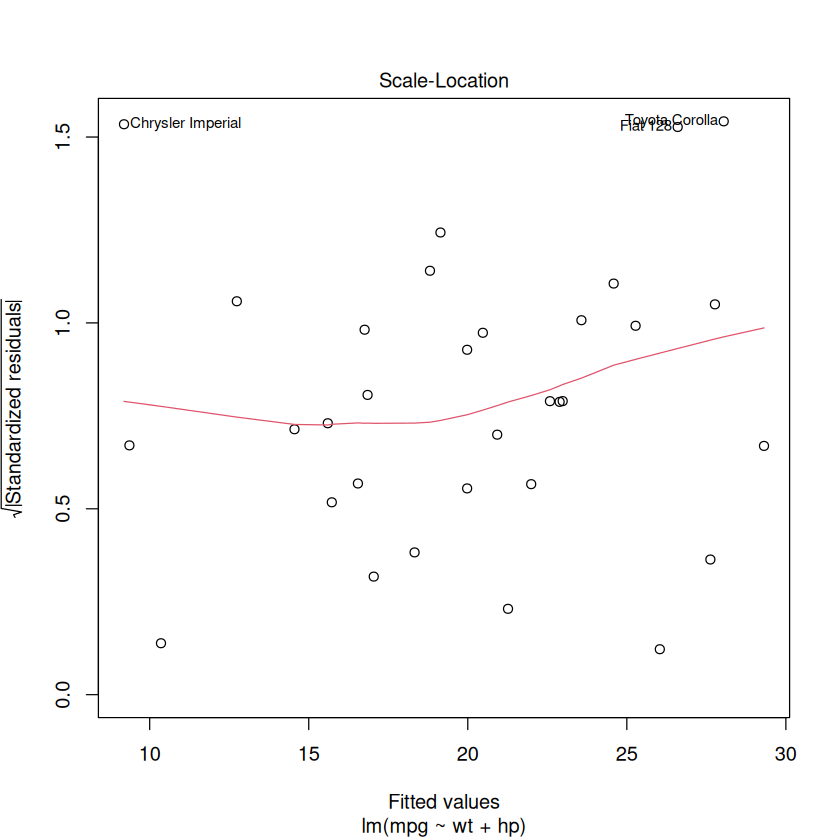

In [38]:
mod <- lm(mpg ~ wt + hp, data=mtcars)
plot(mod, which=3)

If we were concerned here, we would make some scale-location plots per-predictor, like so

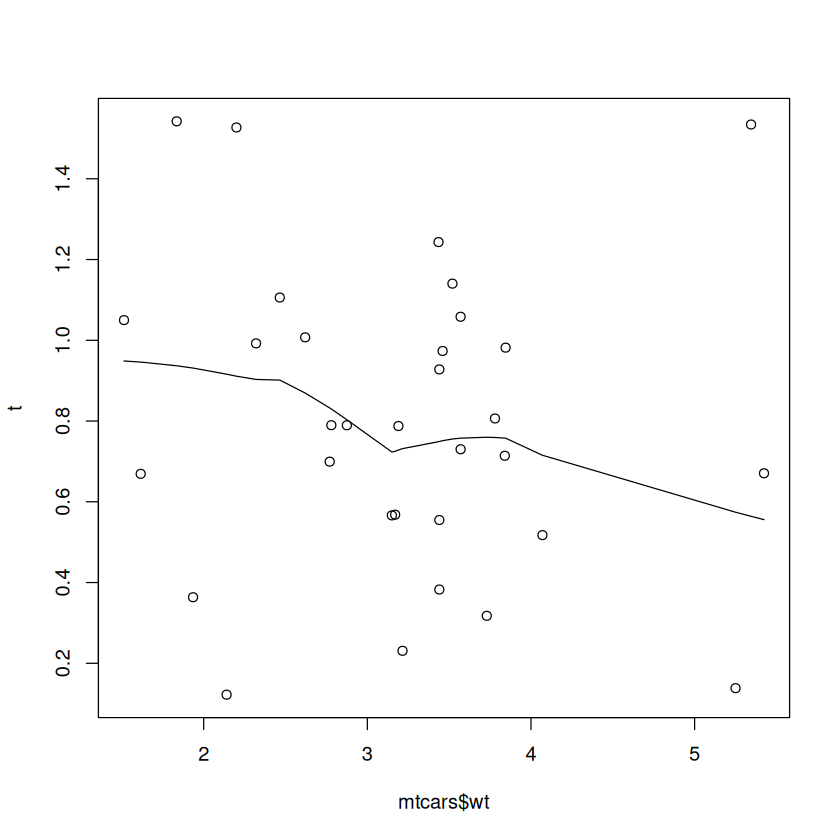

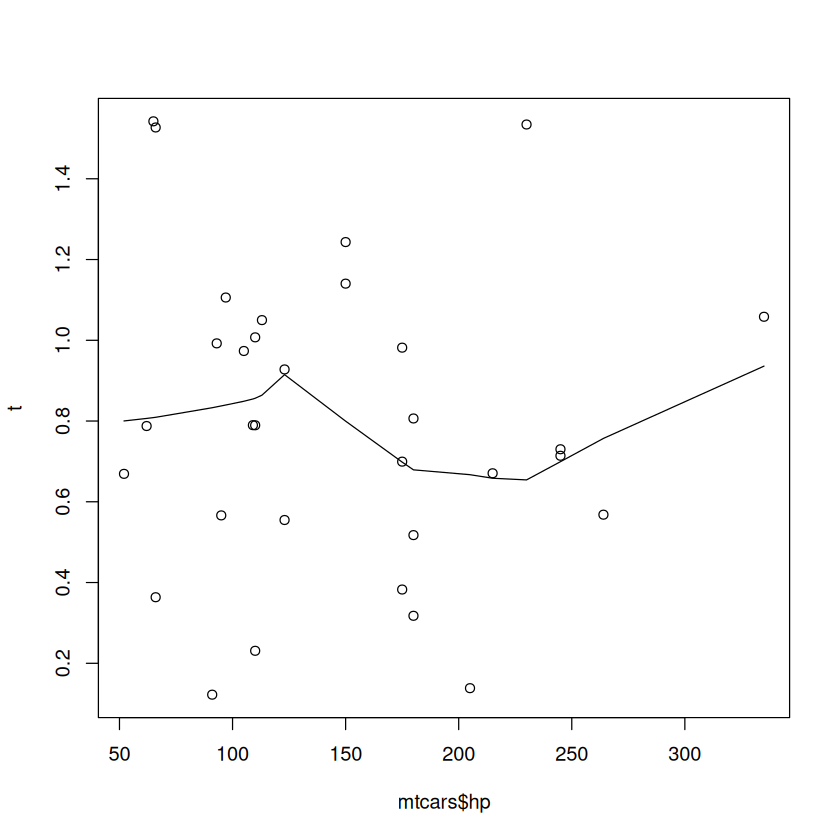

In [41]:
t <- sqrt(abs(rstandard(mod)))
plot(mtcars$wt,t); lines(lowess(mtcars$wt,t))
plot(mtcars$hp,t); lines(lowess(mtcars$hp,t))

If we see structure here, then this can inform us which predictor needs a variance model. If we do not see structure here, then it is possible that it is the variables *in combination* that relate to the heteroscedasticity. In which case, we can actually use the fitted values in the variance function.
 
As an example, if we saw a pattern in *both* plots above, we can use the `varComb()` function to combine two separate variance functions, one for each predictor. This would give

Generalized least squares fit by REML
  Model: mpg ~ wt + hp 
  Data: mtcars 
       AIC      BIC   logLik
  165.9638 174.1676 -76.9819

Combination of variance functions: 
 Structure: Power of variance covariate
 Formula: ~wt 
 Parameter estimates:
     power 
-0.1247311 
 Structure: Power of variance covariate
 Formula: ~hp 
 Parameter estimates:
     power 
-0.3804218 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 35.13419 1.6284501 21.575233   0e+00
wt          -3.43901 0.5266781 -6.529627   0e+00
hp          -0.02863 0.0071133 -4.024356   4e-04

 Correlation: 
   (Intr) wt    
wt -0.726       
hp -0.142 -0.542

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.63605902 -0.74060316 -0.09644555  0.47479612  2.40832416 

Residual standard error: 18.35548 
Degrees of freedom: 32 total; 29 residual

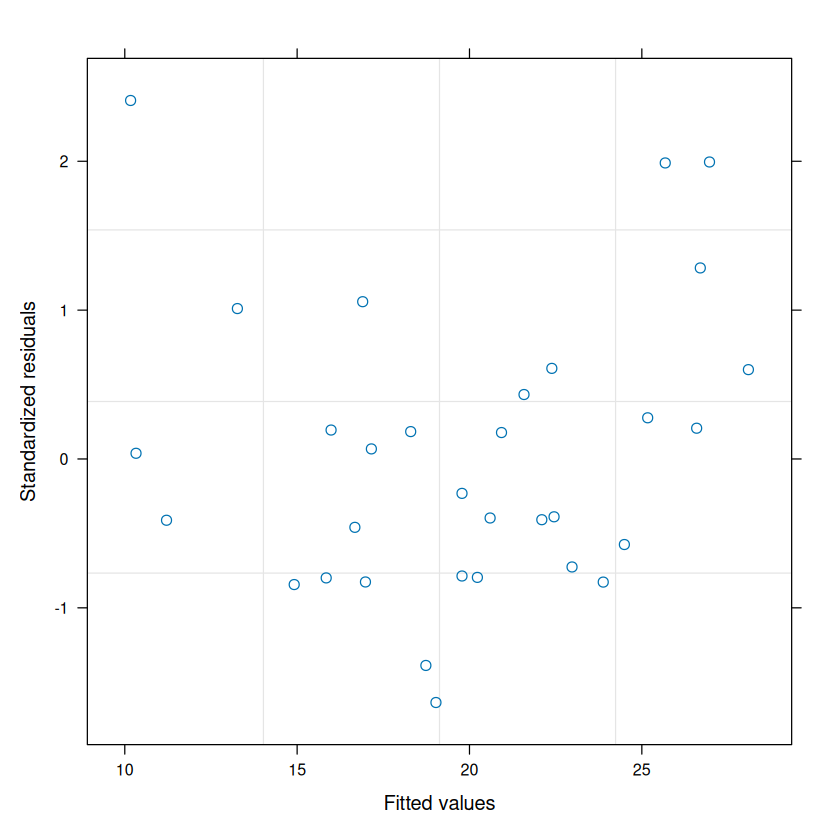

In [42]:
gls.mod <- gls(mpg ~ wt + hp, data=mtcars, weight=varComb(varPower(form= ~ wt), 
                                                          varPower(form= ~ hp)))
summary(gls.mod)
plot(gls.mod)

Note that what we would *not* do usually is `varPower(form= ~ wt + hp)`. Although this will work, the model being used for the variance is $\sigma_{i} = \sigma|x_{i1} + x_{i2}|^{\delta}$. So there is only a single $\delta$ term used to model the sum of the variables (without any regression parameters to convert them on to the same scale). Rarely is this very meaningful.

As an alternative, if there were no structure for the individual variables, but structure in the overall scale-location plot, we can use the fitted values in the variance function like so

Generalized least squares fit by REML
  Model: mpg ~ wt + hp 
  Data: mtcars 
       AIC      BIC    logLik
  165.6521 172.4885 -77.82603

Variance function:
 Structure: Power of variance covariate
 Formula: ~fitted(.) 
 Parameter estimates:
    power 
0.1592261 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 36.71776 1.5905062 23.085583  0.0000
wt          -3.72780 0.6054503 -6.157069  0.0000
hp          -0.03149 0.0087321 -3.606184  0.0012

 Correlation: 
   (Intr) wt    
wt -0.717       
hp -0.019 -0.648

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.54584140 -0.60899176 -0.08507464  0.35367263  2.23006357 

Residual standard error: 1.612278 
Degrees of freedom: 32 total; 29 residual

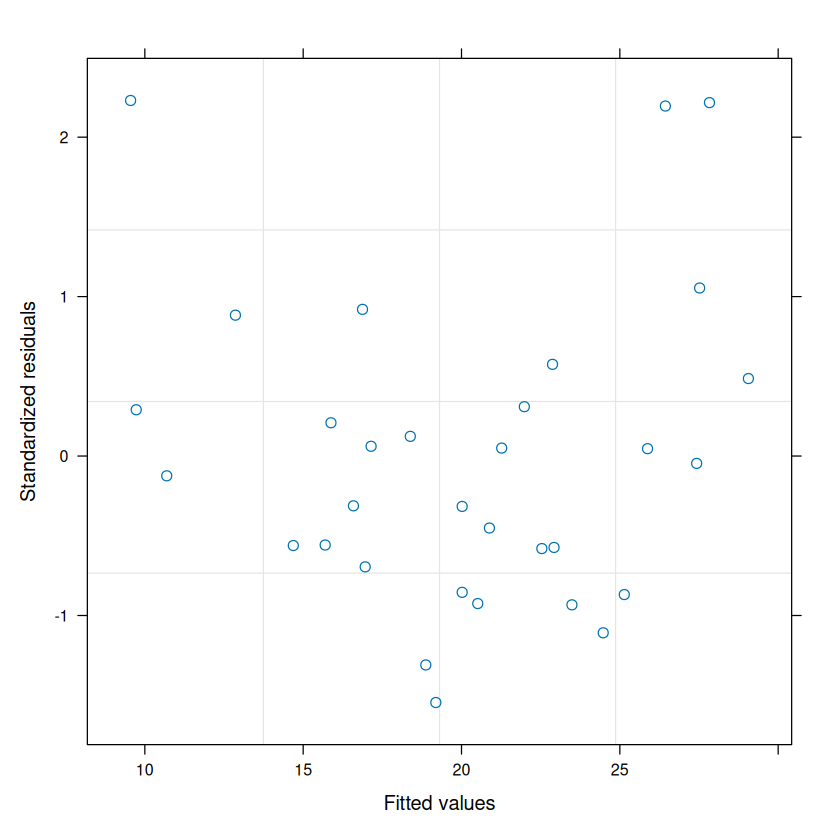

In [44]:
gls.mod <- gls(mpg ~ wt + hp, data=mtcars, weight=varPower(form= ~ fitted(.)))
summary(gls.mod)
plot(gls.mod)

The result is very similar in both cases because there is no real heteroscedasticity problem here. However, it is hopefully clear how this could be used in practice when you have multiple variables.

### Non-parametric Resampling for Non-normality

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = mpg ~ wt + hp + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
    Estimate Iter Pr(Prob)    
wt  -3.16697 5000   0.0004 ***
hp  -0.01804  647   0.1345    
cyl -0.94162  656   0.1326    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-Squared: 0.8431,	Adjusted R-squared: 0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11 


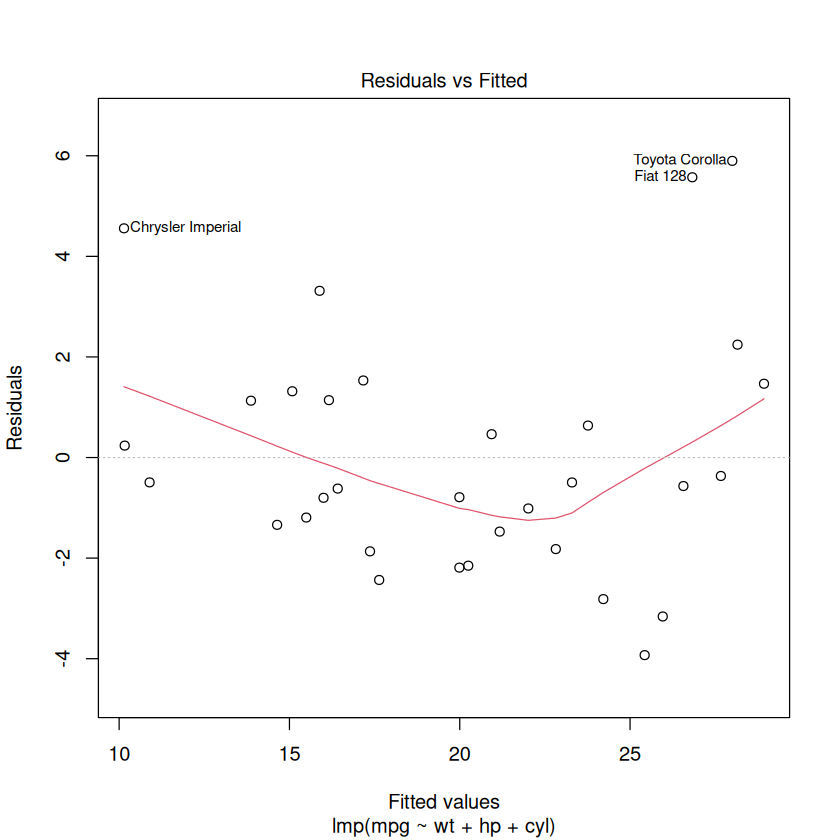

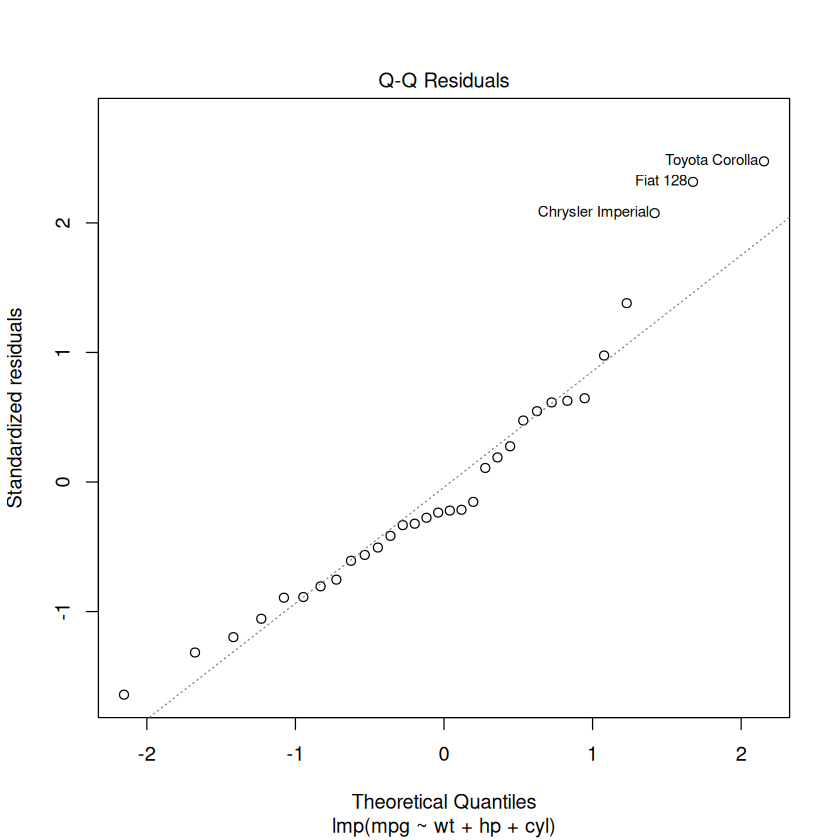

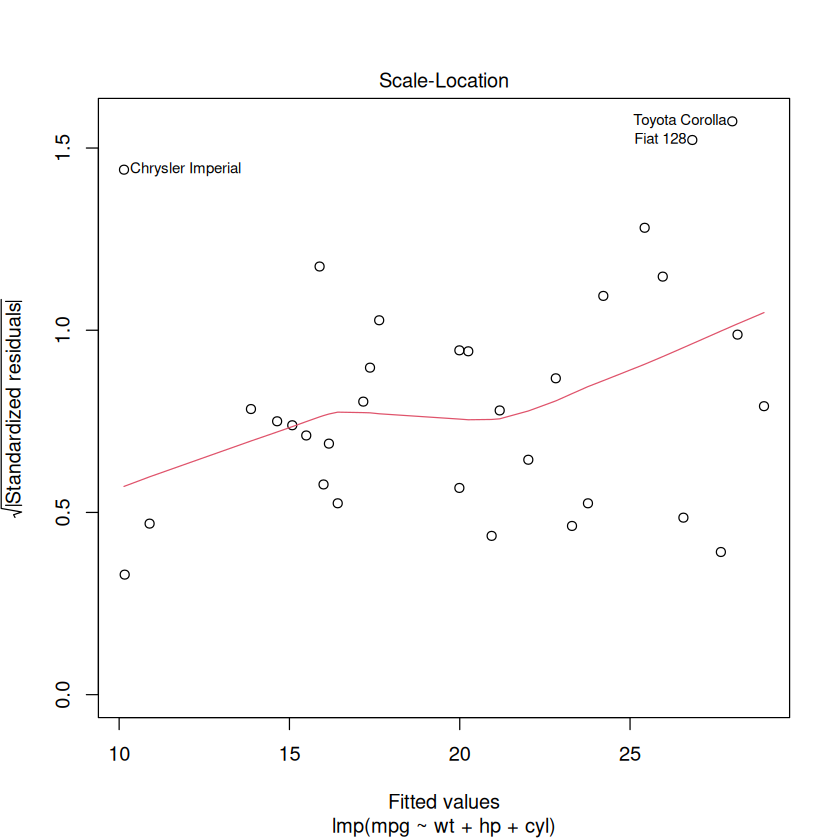

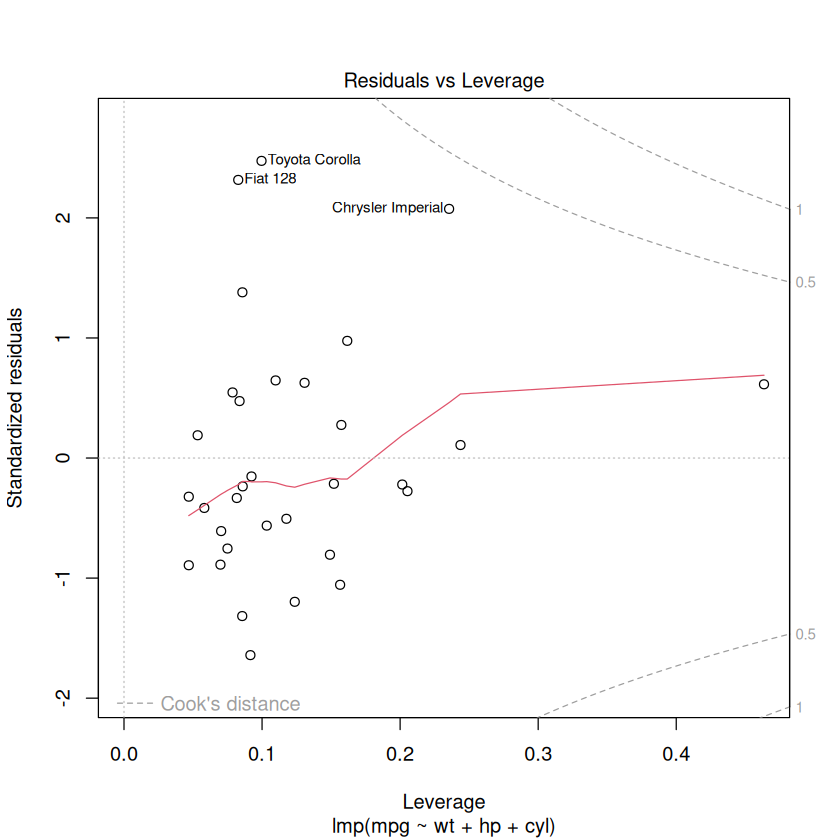

In [51]:
library(lmPerm)
perm.mod <- lmp(mpg ~ wt + hp + cyl, data=mtcars)
summary(perm.mod)
plot(perm.mod)

### What About Multicollinearity?
... It is for these reasons that ridge regression is *not* recommended. Generally, the only solution for multicollinearity is to limit the predictors included in the model. After all, if two predictors are correlated enough to cause problems of multicollinearity, then they are measuring *very similar* phenomena and a clearer conceptual argument needs to be made around why *both* are even necessary. It may well be that the problem you are trying to solve is simply ill-posed. In a way, you are trying to answer a question that the data cannot answer. From this perspective, multicollinearity is not a model error that we can fix, it is a *model criticism*.

### What About Multiple Violations?
Finally, we need to consider what to do if *multiple* assumptions appear to be violated. Unfortunately, all the methods above really only tackle a single violation at a time. Sticking with these approaches, all we can do is select the *dominant* violation to fix and then accept that the rest of the violations remain in place. A good rule-of-thumb is to work through a model by

1. Fixing structural issues with the model form first (anything related to the mean or variance function).
2. Only worry about distributional assumptions second (anything related to outliers or the distributional form).

So, what we need to do is address assumption violations in a logical order based on how much they affect the model.
First, we sort out the mean function. If the relationship is non-linear, we fix that using transformations or a polynomial model. If there is multicollinearity, we must identify it and respecify the model to remove it. This step must come first, because nothing else works properly until the mean is correctly specified.

Once the mean is sorted, we examine the variance function. If there is heteroscedasticity, we use GLS with an appropriate variance function. GLS is our main tool here, and it takes priority over other fixes.

After handling structural issues, we consider outliers. If we are using OLS regression, we can switch to a robust method, which automatically down-weights outliers. If we are using GLS, robust methods are not available, so the practical option is careful removal based on diagnostics.

Finally, we assess the distributional assumptions. If we have not used GLS or robust methods, permutation tests give us valid, distribution-free $p$-values. If we have used GLS or a robust model, permutation is harder to apply, so instead we judge how severe the remaining distributional violation is and adjust our confidence in $p$-values accordingly.